In [90]:
# import the necessary libraries
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt
import urllib.request, json
import datetime
import os
import numpy as np
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler

In [91]:
api_key = 'Q9IQ4JNTSMK6NJMP'
ticker = 'AAL'

In [92]:
path = "C:/Users/Ahmad/Desktop/Python/neural-network-projects/MSFT.csv"

data = pd.read_csv(path)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
...,...,...,...,...,...,...,...
9380,2023-06-01,325.929993,333.529999,324.720001,332.579987,332.579987,26773900
9381,2023-06-02,334.250000,337.500000,332.549988,335.399994,335.399994,25864000
9382,2023-06-05,335.220001,338.559998,334.660004,335.940002,335.940002,21307100
9383,2023-06-06,335.329987,335.369995,332.170013,333.679993,333.679993,20396200


In [93]:
df = data[['Date', 'Close']]

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9380,2023-06-01,332.579987
9381,2023-06-02,335.399994
9382,2023-06-05,335.940002
9383,2023-06-06,333.679993


In [94]:
df.dtypes

Date      object
Close    float64
dtype: object

In [95]:
# Function to convert string to datetime
def str_to_datetime(date_str):
    split = date_str.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime(df.Date[0])
datetime_object

datetime.datetime(1986, 3, 13, 0, 0)

In [96]:
df['Date'] = df['Date'].apply(str_to_datetime)
df.Date

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_13952\3078499078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9380   2023-06-01
9381   2023-06-02
9382   2023-06-05
9383   2023-06-06
9384   2023-06-07
Name: Date, Length: 9385, dtype: datetime64[ns]

In [97]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-06-01,332.579987
2023-06-02,335.399994
2023-06-05,335.940002


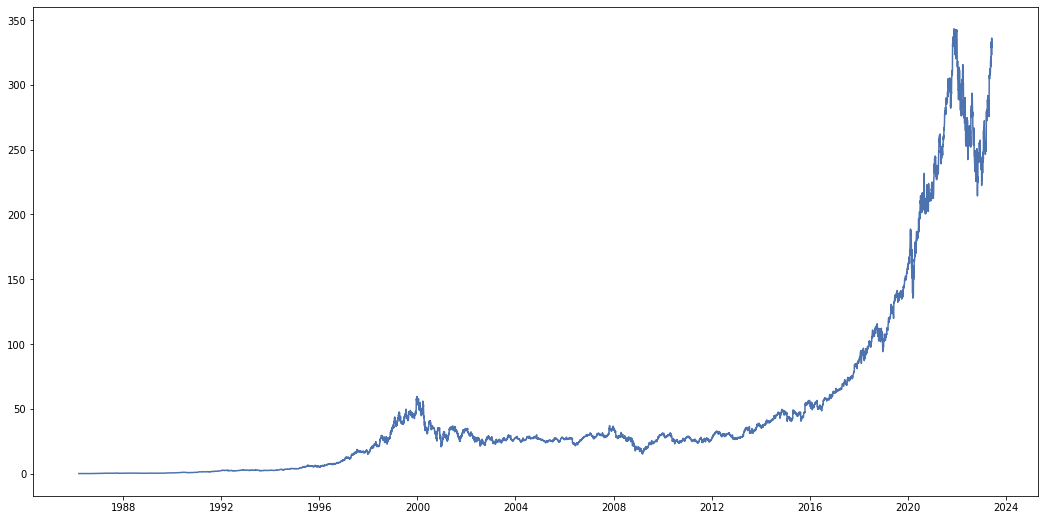

In [98]:
sns.set_palette('deep')
plt.figure(figsize = (18,9))
plt.plot(df.index, df.Close)

In [99]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2023-06-07', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
550,2023-06-01,332.890015,331.209991,328.390015,332.579987
551,2023-06-02,331.209991,328.390015,332.579987,335.399994
552,2023-06-05,328.390015,332.579987,335.399994,335.940002
553,2023-06-06,332.579987,335.399994,335.940002,333.679993


In [100]:
def windowed_df_to_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, 0]
    middle_matrix = df_as_np[:, 1:-1]

    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    y = df_as_np[:, -1]

    return dates, X.astype(np.float32), y.astype(np.float32)

dates, X, y= windowed_df_to_X_y(windowed_df)

dates.shape, X.shape, y.shape

((555,), (555, 3, 1), (555,))

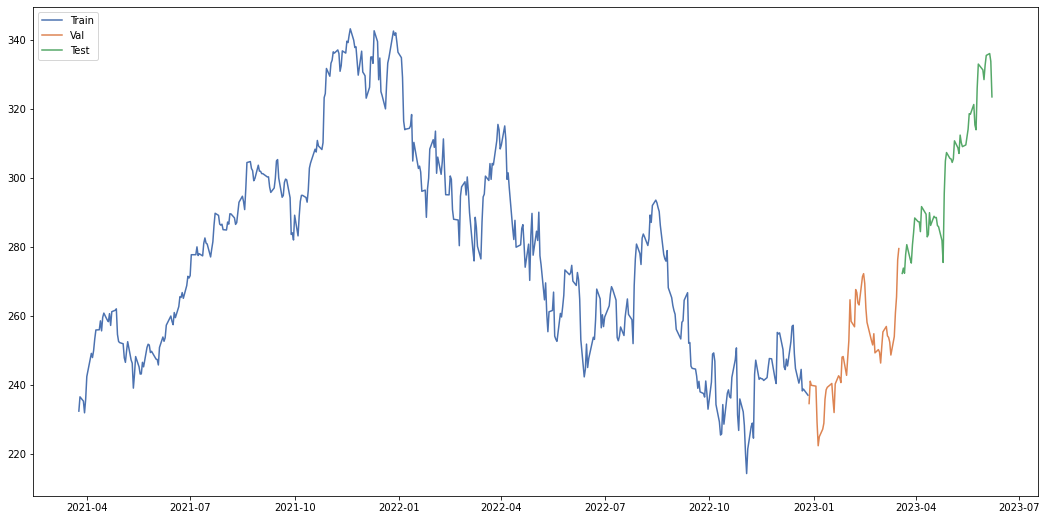

In [101]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, x_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, x_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, x_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize = (18,9))
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Val', 'Test'])

# MODELING

In [107]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from keras.optimizers import Adam 

model = Sequential()
model.add(LSTM(64, input_shape=(3, 1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
14/14 [==============================] - 4s 53ms/step - loss: 77666.7422 - mean_absolute_error: 277.0597 - val_loss: 61924.7227 - val_mean_absolute_error: 248.4932
Epoch 2/100
14/14 [==============================] - 0s 8ms/step - loss: 76926.2578 - mean_absolute_error: 275.7208 - val_loss: 61283.6445 - val_mean_absolute_error: 247.1999
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 76091.3516 - mean_absolute_error: 274.2011 - val_loss: 60329.2227 - val_mean_absolute_error: 245.2616
Epoch 4/100
14/14 [==============================] - 0s 8ms/step - loss: 74748.8359 - mean_absolute_error: 271.7451 - val_loss: 58694.9258 - val_mean_absolute_error: 241.9062
Epoch 5/100
14/14 [==============================] - 0s 8ms/step - loss: 72351.9062 - mean_absolute_error: 267.2897 - val_loss: 55877.4805 - val_mean_absolute_error: 236.0114
Epoch 6/100
14/14 [==============================] - 0s 8ms/step - loss: 68642.9844 - mean_absolute_error: 260.2701 - val_lo

14/14 [==============================] - 1s 2ms/step


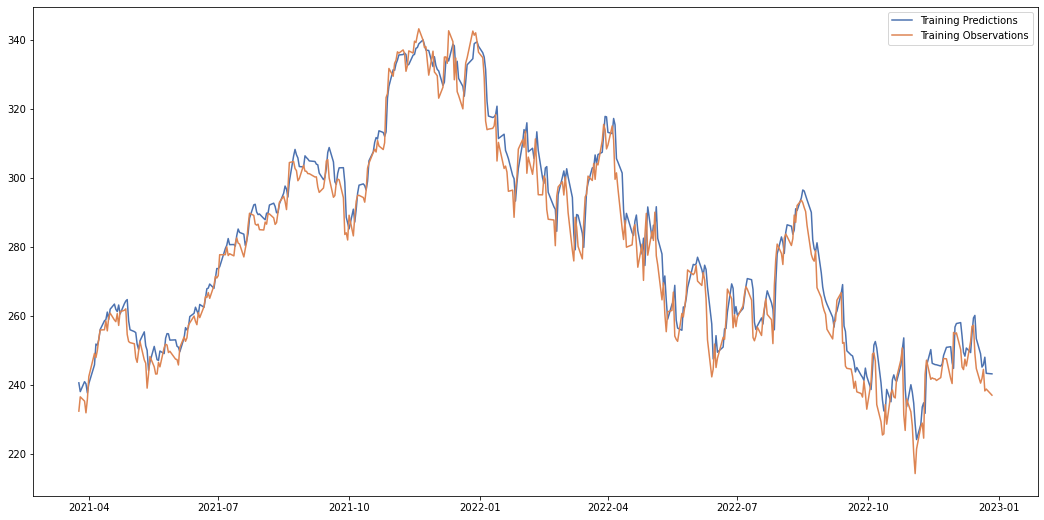

In [108]:
train_predictions = model.predict(x_train).flatten()

plt.figure(figsize = (18,9))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 0s/step


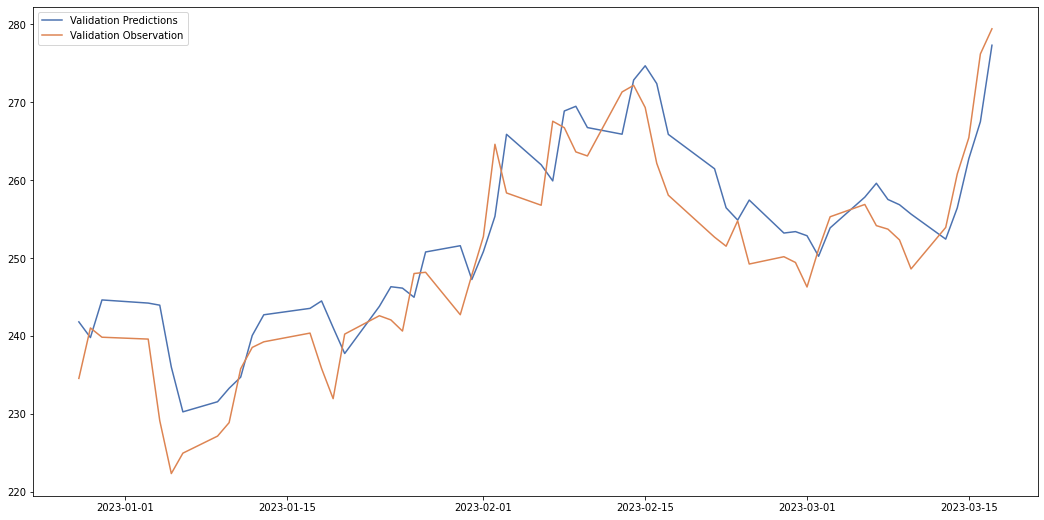

In [109]:
val_predictions = model.predict(x_val).flatten()

plt.figure(figsize = (18,9))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observation'])

2/2 [==============================] - 0s 5ms/step


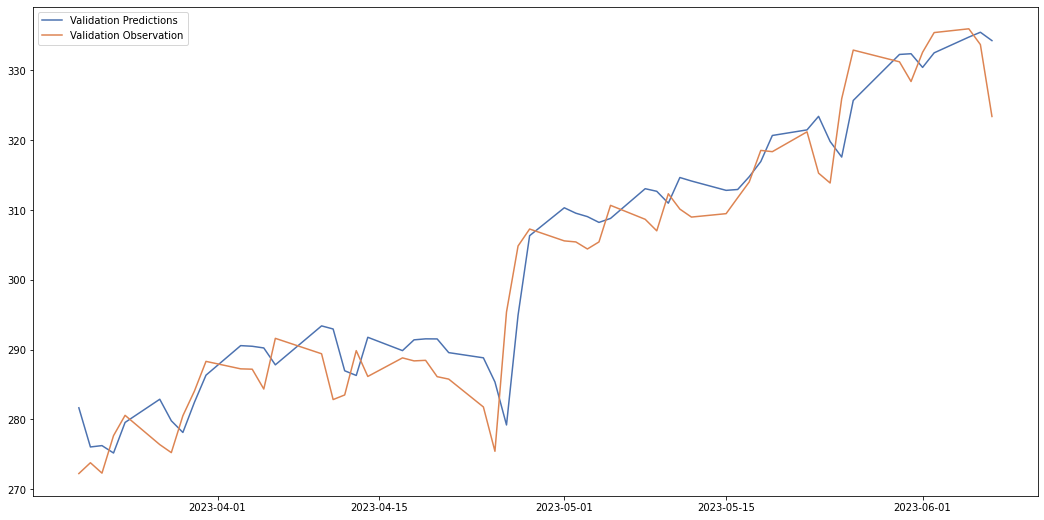

In [110]:
test_predictions = model.predict(x_test).flatten()

plt.figure(figsize = (18,9))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Validation Predictions', 'Validation Observation'])

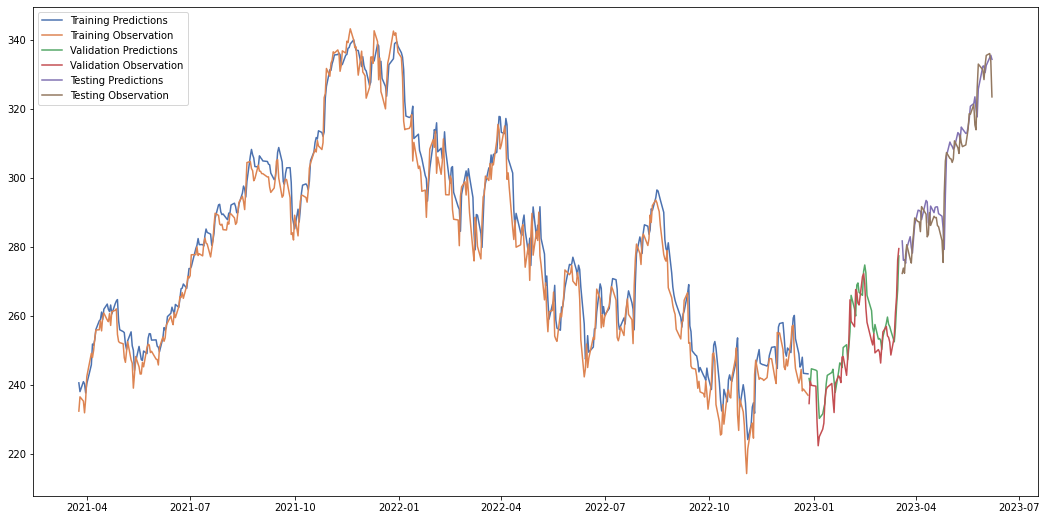

In [111]:
plt.figure(figsize = (18,9))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observation',
            'Validation Predictions',
            'Validation Observation',
            'Testing Predictions',
            'Testing Observation'])

In [112]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
    last_window = deepcopy(x_train[-1])
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction

1/1 [==============================] - 0s 25ms/step


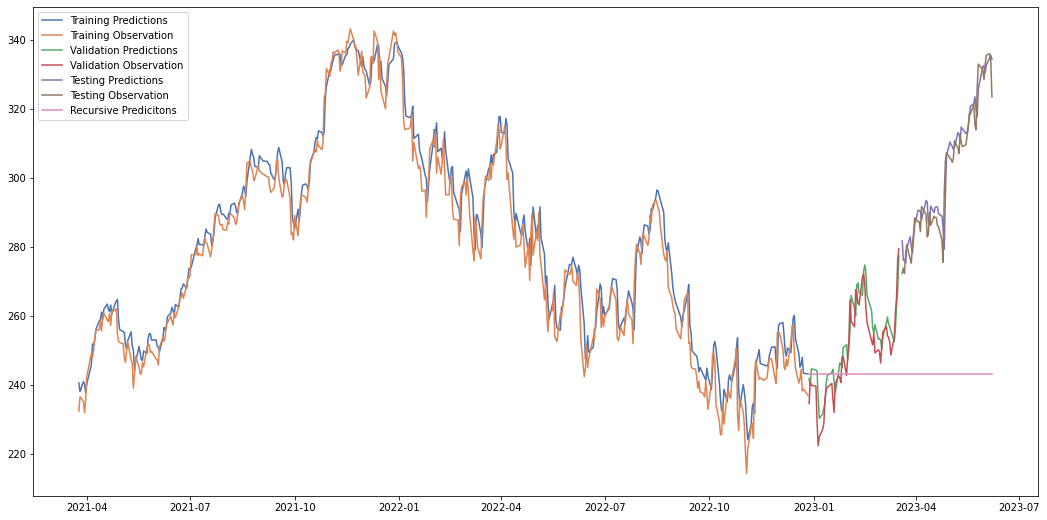

In [113]:
plt.figure(figsize = (18,9))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observation',
            'Validation Predictions',
            'Validation Observation',
            'Testing Predictions',
            'Testing Observation',
            'Recursive Predicitons'])